# CICD Pipelines

## Add a .gitignore
We do not want to load our 'env' folder and all of the contents to github.

In [1]:
import os

file_name = ".gitignore"

content = '''
env/
.ipynb_checkpoints/
.pytest_cache/
__pycache__/
'''

with open(file_name, "w") as target_file:
    target_file.write(content)


## Commit this to github
We have the repo [here](https://github.com/simongarisch/cicd_setup).

## Our environment
We are going to manage the environment with virtualenv

In [2]:
%%bash
source activate py36
virtualenv env

Using base prefix 'c:\\anaconda2\\envs\\py36'
  No LICENSE.txt / LICENSE found in source
New python executable in U:\git\cicd_setup\env\Scripts\python.exe
Installing setuptools, pip, wheel...
done.


In [ ]:
%%bash
source env/scripts/activate
pip install pytest
pip install flask
pip install black

Use this environment to create a requirements.txt file.

In [5]:
%%bash
source env/scripts/activate
pip freeze > requirements.txt

## The script
First we start with a very basic python script...

In [6]:
pycode = '''

def meaning_of_life():
    return 42


def main():
    print(meaning_of_life())


if __name__ == "__main__":
    main()
'''

In [7]:
exec(pycode)

42


In [8]:
import os

file_name = "meaning.py"
with open(file_name, "w") as target_file:
    target_file.write(pycode)


In [9]:
%%bash
cat meaning.py



def meaning_of_life():
    return 42


def main():
    print(meaning_of_life())


if __name__ == "__main__":
    main()


## Testing the script

In [10]:
test_code = """
import pytest
import meaning

def test_meaning():
    assert meaning.meaning_of_life() == 42
"""

In [11]:
file_name = "test_meaning.py"
with open(file_name, "w") as target_file:
    target_file.write(test_code)


In [12]:
%%bash
cat test_meaning.py


import pytest
import meaning

def test_meaning():
    assert meaning.meaning_of_life() == 42


In [13]:
%%bash
source env/scripts/activate
pytest

============================= test session starts =============================
platform win32 -- Python 3.6.6, pytest-4.6.3, py-1.8.0, pluggy-0.12.0
rootdir: U:\git\cicd_setup
collected 1 item

test_meaning.py .                                                        [100%]

========================== 1 passed in 0.39 seconds ===========================


Tests are passing!

## Use Travis CI for Continuous Integration
* Login via https://travis-ci.org/
* Enable your repo in the section https://travis-ci.org/account/repositories
* Commit your changes to github

In [15]:
import os

file_name = ".travis.yml"

content = '''
language: python
script:
  - python -m pytest
'''

with open(file_name, "w") as target_file:
    target_file.write(content)


Travis will then run tests on this repo...

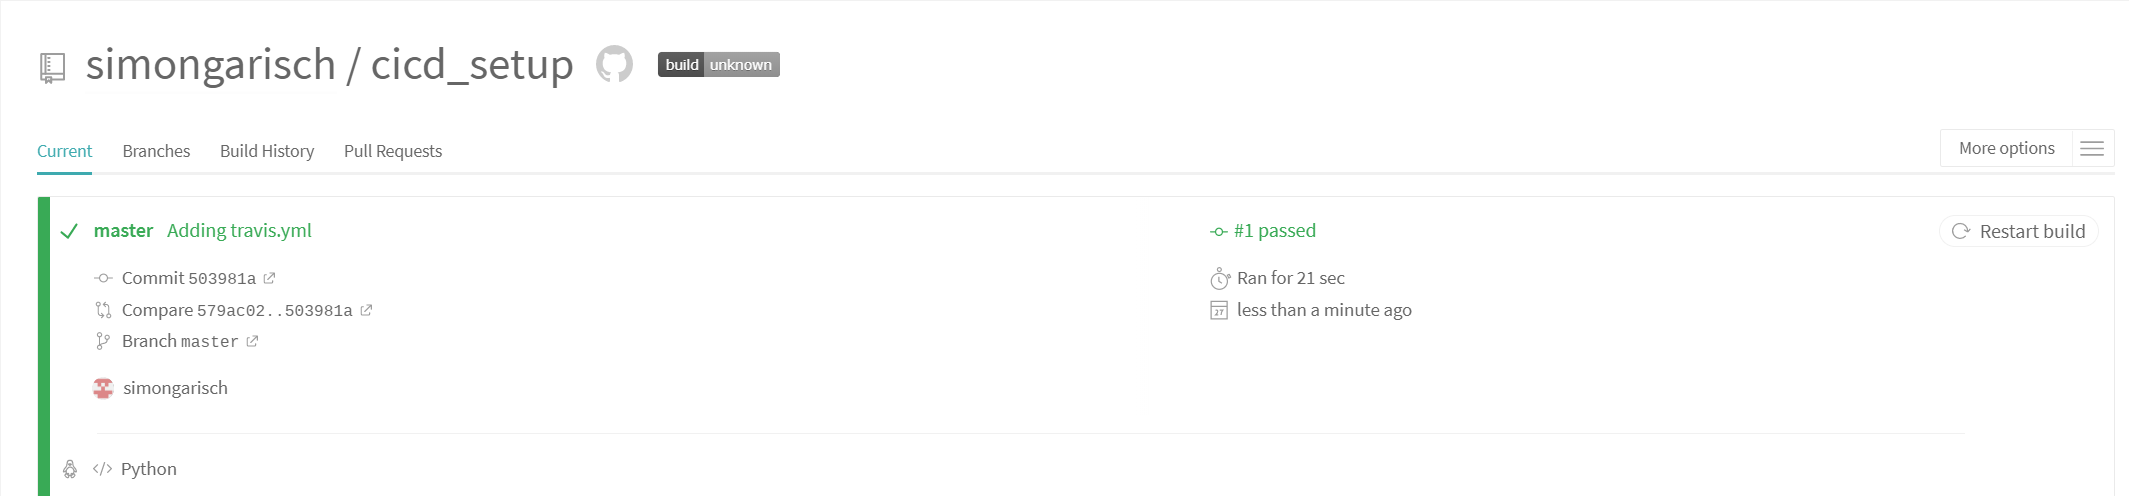

In [18]:
from IPython.display import Image
Image("travis.png")

## Run code formatting with [black](https://github.com/python/black)

In [19]:
%%bash
source activate py36
black meaning.py
black test_meaning.py

reformatted meaning.py
All done! \u2728 \U0001f370 \u2728
1 file reformatted.
reformatted test_meaning.py
All done! \u2728 \U0001f370 \u2728
1 file reformatted.
